In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Import countries shapefile
fp = os.path.join('../data','ne_50m_admin_0_countries','ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)
countries.columns = countries.columns.str.lower()  # Simplify column names
countries = countries[['admin', 'type', 'geometry']]
countries

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."
...,...,...,...
237,Afghanistan,Sovereign country,"POLYGON ((66.52227 37.34849, 66.82773 37.37129..."
238,Siachen Glacier,Indeterminate,"POLYGON ((77.04863 35.10991, 77.00449 35.19634..."
239,Antarctica,Indeterminate,"MULTIPOLYGON (((-45.71777 -60.52090, -45.49971..."
240,Sint Maarten,Country,"POLYGON ((-63.12305 18.06895, -63.01118 18.068..."


In [3]:
# Import Arctic communities GeoJSON directly from URL
URL = 'https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4'
communities = gpd.read_file(URL)
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [4]:
# Import country names from URL
URL = 'https://raw.githubusercontent.com/MEDS-eds-220/MEDS-eds-220-course/refs/heads/main/book/chapters/lesson-12-merge-data/country_names.csv'
country_names = pd.read_csv(URL)
country_names.head()

,country,admin
0,RU,Russia
1,LV,Latvia
2,EE,Estonia
3,LT,Lithuania
4,SE,Sweden


The CRS of the `communities` geodataframe is EPSG:4326 because all GeoJSON files are given in this CRS


In [5]:
# Double check this
communities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
countries.crs == communities.crs

True

Since the CRS match we can plot one with the other

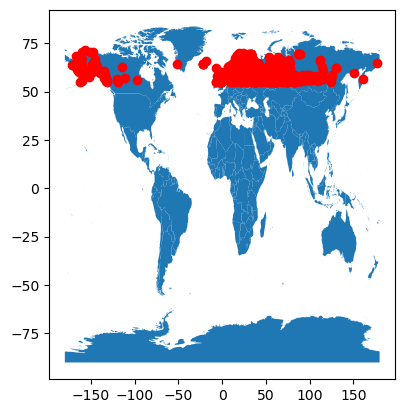

In [8]:
fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color = "red")
plt.show()

## Arctic communities by country


In [9]:
# Number of arctic communities by country
n_comms = (communities.groupby("country")
           .size()
           .reset_index(name="n_communities"))
n_comms

,country,n_communities
0,AX,1
1,BY,8
2,CA,7
3,DK,72
4,EE,14
5,FI,98
6,FO,1
7,GB,96
8,GL,1
9,IS,5


## `if-else` statements
goal: merge # of arctice communities per country with countries' geometry

to merge we want to have at least one column in common

In [10]:
# A set is just a collection of objects that is unordered, can check intersection of sets
set(countries.columns).intersection(n_comms.columns)
# Returns an empty set if none in common

set()

In [11]:
#
common_cols = set(countries.columns).intersection(n_comms.columns)

#Check if there are any common columns 
if len(common_cols) != 0:
    print(f"Common columns: {common_cols}")
else:
    print(f"No columns in common")

No columns in common


## Check in
 Wrap the previous code into a function called check_common_cols that prints a message depending on whether two general data frames have column names in common

 # Reindenting:
 ctrl + [ or ctrl + ]

In [12]:
def check_common_cols(df1, df2):
    """
    Prints a message depending on whether or not two given pandas data frames (df1 and df2) have columns in common
    """
    common_cols = set(df1.columns).intersection(df2.columns)
    #Check if there are any common columns 
    if len(common_cols) != 0:
        print(f"Common columns: {common_cols}")
    else:
        print(f"No columns in common")

In [13]:
check_common_cols(countries, n_comms)

No columns in common


## Merging dataframes

we want to 
1. use the `country_names` df to add the country names to the `n_comms` data
2. merge the resulting df with `country_names`

To merge data frames we can use `pandas.merge()` 

```python
output_df = pd.merge(left_df, # df on left side
                    right_df, # df on the right side
                    how = type_of_join, # type of joni default=inner 
                    on = column_to_join) # which column to join on (must be in both dfs)
```



In [14]:
n_comms = pd.merge(n_comms, 
                   country_names, 
                   how = "left", 
                   on = "country")
n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
1,BY,8,Belarus
2,CA,7,Canada
3,DK,72,Denmark
4,EE,14,Estonia
5,FI,98,Finland
6,FO,1,Faroe Islands
7,GB,96,United Kingdom
8,GL,1,Greenland
9,IS,5,Iceland


In [15]:
check_common_cols(n_comms, countries)

Common columns: {'admin'}


# Check in 
create a new variable called arctice_countries which is the result of an inner houn between countries and n_comms

In [16]:
arctic_countries = pd.merge(countries, 
                            n_comms, 
                            how = "inner", 
                            on = "admin")
arctic_countries

,admin,type,geometry,country,n_communities
0,United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
1,United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
2,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
3,Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
4,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
5,Lithuania,Sovereign country,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55...",LT,26
6,Latvia,Sovereign country,"POLYGON ((26.59355 55.66753, 26.54287 55.67241...",LV,25
7,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
8,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
9,Estonia,Sovereign country,"MULTIPOLYGON (((27.35195 57.52812, 27.32656 57...",EE,14


Checking the resulting data we notice we lost the Aland Islands

In [17]:
# Update index
arctic_countries = arctic_countries.set_index('admin')
arctic_countries.head()

,type,geometry,country,n_communities
admin,,,,
United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48


In [18]:
# Check that Aland Islands is nowhere in the df
'Aland Islands' in arctic_countries.values

False

The Aland Islands are an autonomous region of Finland and there is only one community registered
We will directly add one to finland to account for this


In [19]:
arctic_countries.at["Finland", "n_communities"]

98

In [20]:
arctic_countries.at["Finland", "n_communities"] +=1

In [22]:
arctic_countries.at["Finland", "n_communities"]

99

## Choropleth map

Making a choropleth map we just need to specify the column parameter in plot and make it equal to the column with the values we want to plot in each country

<Axes: >

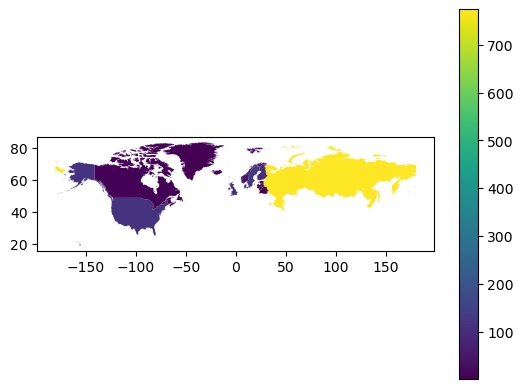

In [23]:
arctic_countries.plot(column="n_communities", 
                      legend = True)

# We want to reproject to a CRS that is optimized to better visualize Arctic region 

## Reprojecting
`to_crs()` method for `geopandas.DataFrame`

```
updated_geodf = geodf.to_crs(new_crs)
```
 new_crs is the crs we want to convert to

In [24]:
# Reprojecting 
arctic_countries = arctic_countries.to_crs("EPSG:3413")

<Axes: >

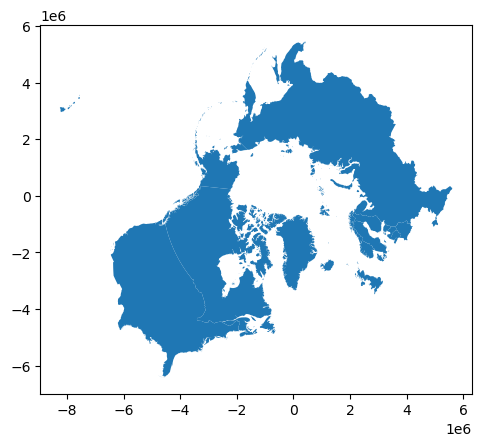

In [25]:
arctic_countries.plot()

<Axes: >

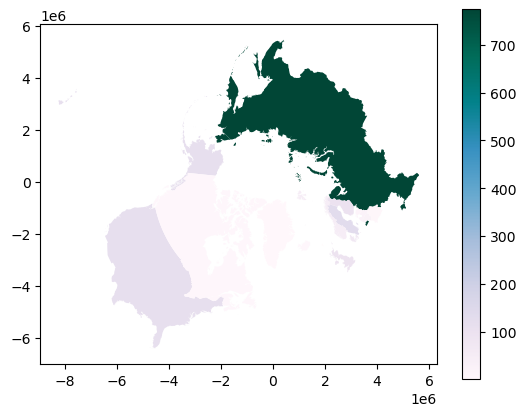

In [35]:
arctic_countries.plot(column="n_communities", 
                      legend = True, 
                      cmap = "PuBuGn")